In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib.lines import Line2D 
import matplotlib.gridspec as gridspec
import scipy.stats as stats
from sklearn.neighbors import KernelDensity
%matplotlib inline

In [45]:
stress = np.loadtxt('stress_params.txt', delimiter=',')
rakes = np.loadtxt('rakes_1.txt', delimiter = ',')

In [7]:
np.shape(spboth[:, 6])

(10000000,)

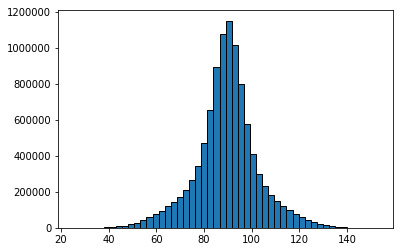

In [61]:
plt.hist(rakes[:, 1]*180/np.pi, edgecolor='black', bins = 50)
#plt.hist(rakes40*180/np.pi, edgecolor='black', bins = 100)
plt.show()



In [62]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

In [ ]:
x_grid = np.linspace(0, 2*np.pi, 1000)

fig, ax = plt.subplots()
for bandwidth in [0.1]:
    ax.plot(x_grid, kde_sklearn(rakes[:, 1], x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.5)
ax.hist(rakes5, 30, fc='gray', histtype='stepfilled', alpha=0.3, normed=True)
ax.legend(loc='upper left')

In [ ]:
plt.hist(stress_output5[:, 2]*180/np.pi, bins =100, edgecolor='black')
plt.hist(stress_output40[:, 2]*180/np.pi, bins =100, edgecolor='black')
plt.show()


In [ ]:
plt.hist(stress_output5[:, 3]*180/np.pi, bins =100, edgecolor='black')
plt.hist(stress_output40[:, 3]*180/np.pi, bins =100, edgecolor='black')
plt.show()


In [ ]:
plt.hist(stress_output5[:, 4]*180/np.pi, bins =100, edgecolor='black')
plt.hist(stress_output40[:, 4]*180/np.pi, bins =100, edgecolor='black')
plt.show()

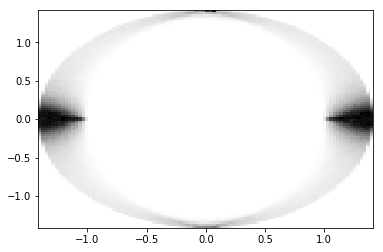

In [59]:

plt.hist2d(stress[:, 5], stress[:, 6], bins = 100, cmap= "binary", zorder = 0)
plt.show()

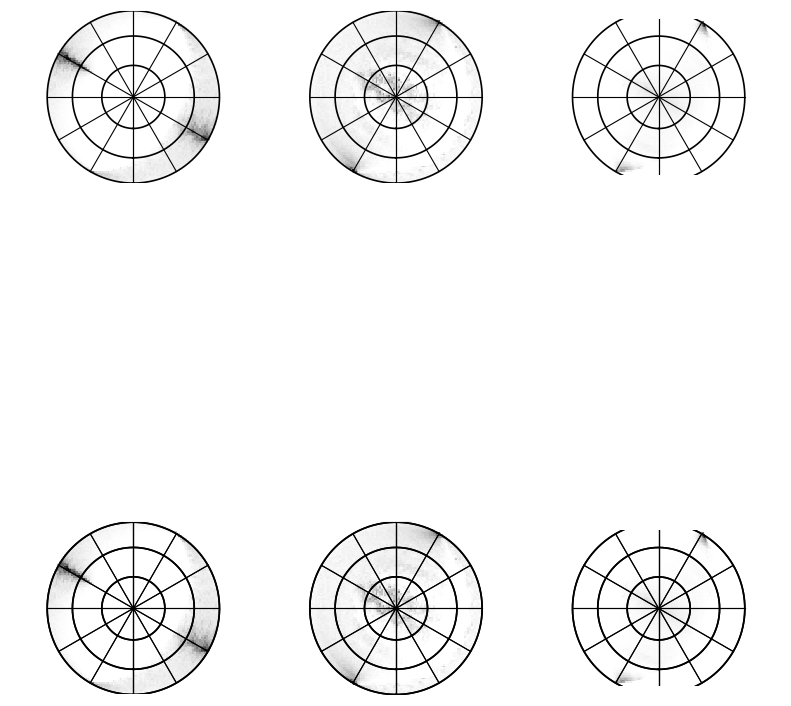

In [31]:
gs = gridspec.GridSpec(3, 3)

r1 = np.sqrt(2)
r2 = 1
r3 = 1/(np.sqrt(2+np.sqrt(3)))

x = np.linspace(-np.pi, np.pi, 1000)
theta = np.array([0, np.pi/6, np.pi/3, np.pi/2])
x_lines = r1*np.cos(theta)
y_lines = r1*np.sin(theta)


plt.figure(figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(gs[2, 0])

ax.hist2d(spboth[:, 5], spboth[:, 6], bins = 100, cmap= "gist_yarg", zorder = 0)

ax.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax.set_axis_off()
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([-2, 2])



ax1 = plt.subplot(gs[2, 1]) # row 0, col 1
ax1.hist2d(spboth[:, 7], spboth[:, 8], bins = 100, cmap= "gist_yarg", zorder = 0)

ax1.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax1.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax1.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax1.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax1.set_axis_off()
ax1.set_aspect('equal')
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_xlim([-2, 2])


ax2 = plt.subplot(gs[2, 2]) # row 1, span all columns
ax2.hist2d(spboth[:, 9], spboth[:, 10], bins = 100, cmap= "gist_yarg", zorder = 0)

ax2.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax2.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax2.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax2.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax2.set_axis_off()
ax2.set_aspect('equal')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlim([-2, 2])

ax3 = plt.subplot(gs[0, 0])

ax3.hist2d(sp1[:, 5], sp1[:, 6], bins = 100, cmap= "gist_yarg", zorder = 0)

ax3.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax3.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax3.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax3.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax3.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax3.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax3.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax3.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax3.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax3.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax3.set_axis_off()
ax3.set_aspect('equal')
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_xlim([-2, 2])



ax4 = plt.subplot(gs[0, 1]) # row 0, col 1
ax4.hist2d(sp1[:, 7], sp1[:, 8], bins = 100, cmap= "gist_yarg", zorder = 0)

ax4.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax4.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax4.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax4.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax4.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax4.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax4.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax4.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax4.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax4.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax4.set_axis_off()
ax4.set_aspect('equal')
ax4.set_xticks([])
ax4.set_yticks([])

ax4.set_xlim([-2, 2])


ax5 = plt.subplot(gs[0, 2]) # row 1, span all columns
ax5.hist2d(sp1[:, 9], sp1[:, 10], bins = 100, cmap= "gist_yarg", zorder = 0)

ax5.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax5.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax5.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax5.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax5.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax5.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax5.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax5.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax5.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax5.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax5.set_axis_off()
ax5.set_aspect('equal')
ax5.set_xticks([])
ax5.set_yticks([])
ax5.set_xlim([-2, 2])

ax6 = plt.subplot(gs[2, 0])

ax6.hist2d(sp1[:, 5], sp1[:, 6], bins = 100, cmap= "gist_yarg", zorder = 0)

ax6.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax6.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax6.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax6.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax6.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax6.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax6.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax6.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax6.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax6.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax6.set_axis_off()
ax6.set_aspect('equal')
ax6.set_xticks([])
ax6.set_yticks([])
ax6.set_xlim([-2, 2])



ax7 = plt.subplot(gs[2, 1]) # row 0, col 1
ax7.hist2d(sp1[:, 7], sp1[:, 8], bins = 100, cmap= "gist_yarg", zorder = 0)

ax7.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax7.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax7.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax7.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax7.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax7.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax7.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax7.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax7.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax7.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax7.set_axis_off()
ax7.set_aspect('equal')
ax7.set_xticks([])
ax7.set_yticks([])

ax7.set_xlim([-2, 2])


ax8 = plt.subplot(gs[2, 2]) # row 1, span all columns
ax8.hist2d(sp1[:, 9], sp1[:, 10], bins = 100, cmap= "gist_yarg", zorder = 0)

ax8.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax8.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax8.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax8.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax8.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax8.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax8.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax8.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax8.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax8.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax8.set_axis_off()
ax8.set_aspect('equal')
ax8.set_xticks([])
ax8.set_yticks([])
ax8.set_xlim([-2, 2])

plt.tight_layout()





plt.savefig('test.pdf')
plt.show()


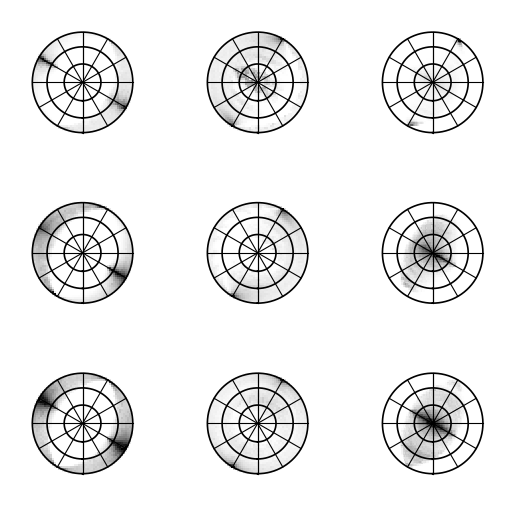

In [39]:
gs = gridspec.GridSpec(3, 3)

r1 = np.sqrt(2)
r2 = 1
r3 = 1/(np.sqrt(2+np.sqrt(3)))

x = np.linspace(-np.pi, np.pi, 1000)
theta = np.array([0, np.pi/6, np.pi/3, np.pi/2])
x_lines = r1*np.cos(theta)
y_lines = r1*np.sin(theta)


plt.figure(figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(gs[2, 0])

ax.hist2d(spboth[:, 5], spboth[:, 6], bins = 50, cmap= "binary", zorder = 0)

ax.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax.set_axis_off()
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])



ax1 = plt.subplot(gs[2, 1]) # row 0, col 1
ax1.hist2d(spboth[:, 7], spboth[:, 8], bins = 50, cmap= "binary", zorder = 0)

ax1.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax1.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax1.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax1.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax1.set_axis_off()
ax1.set_aspect('equal')
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_xlim([-2, 2])
ax1.set_ylim([-2, 2])


ax2 = plt.subplot(gs[2, 2]) # row 1, span all columns
ax2.hist2d(spboth[:, 9], spboth[:, 10], bins = 50, cmap= "binary", zorder = 0)

ax2.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax2.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax2.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax2.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax2.set_axis_off()
ax2.set_aspect('equal')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlim([-2, 2])
ax2.set_ylim([-2, 2])

ax3 = plt.subplot(gs[0, 0])

ax3.hist2d(sp1[:, 5], sp1[:, 6], bins = 50, cmap= "binary", zorder = 0)

ax3.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax3.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax3.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax3.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax3.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax3.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax3.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax3.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax3.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax3.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax3.set_axis_off()
ax3.set_aspect('equal')
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_xlim([-2, 2])
ax3.set_ylim([-2, 2])



ax4 = plt.subplot(gs[0, 1]) # row 0, col 1
ax4.hist2d(sp1[:, 7], sp1[:, 8], bins = 50, cmap= "binary", zorder = 0)

ax4.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax4.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax4.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax4.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax4.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax4.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax4.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax4.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax4.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax4.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax4.set_axis_off()
ax4.set_aspect('equal')
ax4.set_xticks([])
ax4.set_yticks([])

ax4.set_xlim([-2, 2])
ax4.set_ylim([-2, 2])



ax5 = plt.subplot(gs[0, 2]) # row 1, span all columns
ax5.hist2d(sp1[:, 9], sp1[:, 10], bins = 50, cmap= "binary", zorder = 0)

ax5.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax5.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax5.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax5.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax5.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax5.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax5.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax5.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax5.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax5.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax5.set_axis_off()
ax5.set_aspect('equal')
ax5.set_xticks([])
ax5.set_yticks([])
ax5.set_xlim([-2, 2])
ax5.set_ylim([-2, 2])

ax6 = plt.subplot(gs[1, 0])

ax6.hist2d(sp2[:, 5], sp2[:, 6], bins = 50, cmap= "binary", zorder = 0)

ax6.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax6.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax6.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax6.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax6.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax6.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax6.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax6.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax6.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax6.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax6.set_axis_off()
ax6.set_aspect('equal')
ax6.set_xticks([])
ax6.set_yticks([])
ax6.set_xlim([-2, 2])
ax6.set_ylim([-2, 2])



ax7 = plt.subplot(gs[1, 1]) # row 0, col 1
ax7.hist2d(sp2[:, 7], sp2[:, 8], bins = 50, cmap= "binary", zorder = 0)

ax7.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax7.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax7.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax7.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax7.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax7.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax7.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax7.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax7.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax7.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax7.set_axis_off()
ax7.set_aspect('equal')
ax7.set_xticks([])
ax7.set_yticks([])

ax7.set_xlim([-2, 2])
ax7.set_ylim([-2, 2])


ax8 = plt.subplot(gs[1, 2]) # row 1, span all columns
ax8.hist2d(sp2[:, 9], sp2[:, 10], bins = 50, cmap= "binary", zorder = 0)

ax8.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax8.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax8.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax8.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax8.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax8.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax8.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax8.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax8.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax8.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax8.set_axis_off()
ax8.set_aspect('equal')
ax8.set_xticks([])
ax8.set_yticks([])
ax8.set_xlim([-2, 2])
ax8.set_ylim([-2, 2])

plt.tight_layout

plt.savefig('test.pdf')
plt.show()


NameError: name 'stress_output' is not defined

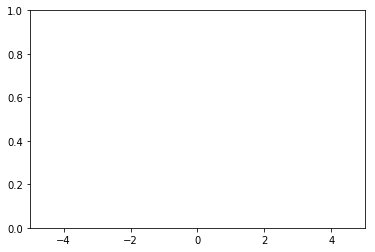

In [33]:
fig = plt.figure()

ax = fig.add_subplot(111)

r1 = np.sqrt(2)
r2 = 1
r3 = 1/(np.sqrt(2+np.sqrt(3)))

x = np.linspace(-np.pi, np.pi, 1000)
theta = np.array([0, np.pi/6, np.pi/3, np.pi/2])
x_lines = r1*np.cos(theta)
y_lines = r1*np.sin(theta)

ax.set_xlim([-5, 5])



ax.hist2d(stress_output[:, 7], stress_output[:, 8], bins = 100, cmap= "gist_yarg", zorder = 0)

ax.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax.set_axis_off()
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('ICS Piercing Points')

ax.set_xlim([-2, 2])
plt.savefig("/home/rwcline/Desktop/Thrust_NP1&2_ICS.png")


plt.show()

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(111)

r1 = np.sqrt(2)
r2 = 1
r3 = 1/(np.sqrt(2+np.sqrt(3)))

x = np.linspace(-np.pi, np.pi, 1000)
theta = np.array([0, np.pi/6, np.pi/3, np.pi/2])
x_lines = r1*np.cos(theta)
y_lines = r1*np.sin(theta)

ax.set_xlim([-5, 5])



ax.hist2d(stress_output5[:, 9], stress_output5[:, 10], bins = 100, cmap= "gist_yarg", zorder = 0)

ax.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax.set_axis_off()
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('LCS Piercing Points')

ax.set_xlim([-2, 2])
plt.savefig("/home/rwcline/Desktop/Thrust_NP1&2_LCS.png")

plt.show()

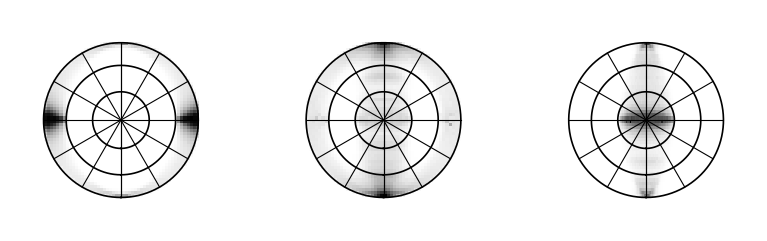

In [60]:
gs = gridspec.GridSpec(1, 3)

r1 = np.sqrt(2)
r2 = 1
r3 = 1/(np.sqrt(2+np.sqrt(3)))

x = np.linspace(-np.pi, np.pi, 1000)
theta = np.array([0, np.pi/6, np.pi/3, np.pi/2])
x_lines = r1*np.cos(theta)
y_lines = r1*np.sin(theta)


plt.figure(figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

ax = plt.subplot(gs[0, 0])

ax.hist2d(stress[:, 5], stress[:, 6], bins = 50, cmap= "binary", zorder = 0)

ax.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax.set_axis_off()
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])



ax1 = plt.subplot(gs[0, 1]) # row 0, col 1
ax1.hist2d(stress[:, 7], stress[:, 8], bins = 50, cmap= "binary", zorder = 0)

ax1.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax1.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax1.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax1.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax1.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax1.set_axis_off()
ax1.set_aspect('equal')
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_xlim([-2, 2])
ax1.set_ylim([-2, 2])


ax2 = plt.subplot(gs[0, 2]) # row 1, span all columns
ax2.hist2d(stress[:, 9], stress[:, 10], bins = 50, cmap= "binary", zorder = 0)

ax2.plot([-x_lines[0], x_lines[0]], [y_lines[0], y_lines[0]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[1], x_lines[1]], [-y_lines[1], y_lines[1]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[2], x_lines[2]], [-y_lines[2], y_lines[2]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[3], x_lines[3]], [-y_lines[3], y_lines[3]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[1], x_lines[1]], [y_lines[1], -y_lines[1]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[2], x_lines[2]], [y_lines[2], -y_lines[2]], lw=1, color='k', zorder = 10)
ax2.plot([-x_lines[3], x_lines[3]], [y_lines[3], -y_lines[3]], lw=1, color='k', zorder = 10)

ax2.plot(r1*np.sin(x), r1*np.cos(x), 'k', zorder = 100)
ax2.plot(r2*np.sin(x), r2*np.cos(x), 'k', zorder = 100)
ax2.plot(r3*np.sin(x), r3*np.cos(x), 'k', zorder = 100)
ax2.set_axis_off()
ax2.set_aspect('equal')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlim([-2, 2])
ax2.set_ylim([-2, 2])



plt.tight_layout

plt.savefig('test.pdf')
plt.show()
